# Decision Tree

- A Decision Tree is a machine learning algorithm used for both classification and regression tasks. It works by splitting data into smaller groups based on certain conditions, forming a tree-like structure.
- Decision tree is a graph used to represent choices and their results in form of a tree.
- The model itself comprises a series of logical decisions, similar to a flowchart, with decision nodes that indicate a decision to be made on an attribute.
- These split into branches that indicate the decision's choices.
- 

#### Advantages
- Easy to understand and interpret.
- Handles both numerical and categorical data.
- No need for feature scaling.
- Works well with small datasets and gives good interpretability.
#### Examples
- Bank Loan Approval: A bank decides whether to approve a loan based on salary, credit score, and debt history.
- Medical Diagnosis: A doctor predicts whether a patient has a disease based on symptoms.
- Spam Detection: An email is classified as spam or not spam based on words used in the message.

#### How a Decision Tree Works

A decision tree consists of:

- Root Node: The starting point (e.g., “Is age > 30?”).
- Decision Nodes: Intermediate questions splitting the data (e.g., “Does the person have a high credit score?”).
- Leaf Nodes: The final decision (e.g., “Approve Loan” or “Reject Loan”).

#### Example

Imagine we want to predict if a person will buy a house based on age and income. 

In [10]:
import pandas as pd

# Create the dataset
data = {
    'Age': [25, 30, 35, 40, 20],
    'Income': ['Low', 'High', 'Medium', 'High', 'Low'],
    'Buys_House': ['No', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

print(df)


   Age  Income Buys_House
0   25     Low         No
1   30    High        Yes
2   35  Medium        Yes
3   40    High        Yes
4   20     Low         No


In [ ]:
A decision tree might look like:

In [ ]:
Is Age > 30?
          /   \
      Yes      No
      /          \
  Income High?    No House
  /       \
Yes       No House

## Key Concepts

#### 1. Splitting

- The tree decides where to split data using criteria like Gini Impurity or Entropy.
- It chooses the best feature to split first.

#### 2. Gini Impurity

- Gini Impurity/index is a metric to measure how often a randomly chosen element would be incorrectly identified.
- Measures how pure the groups are after a split.
- Lower Gini means better splits i.e. It means an attribute with lower gini index should be preferred.

#### 3. Entropy & Information Gain

- Entropy is the measure of uncertainty of a
random variable, it characterizes the impurity of
an arbitrary collection of examples. The higher
the entropy the more the information content.
- Information gain tells us how much a split improves the prediction.

#### 4. Overfitting

- If a tree is too deep, it memorizes training data but performs poorly on new data.
- Solution: Pruning (cutting unnecessary branches).

## Decision Trees in Python

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
file_path = "accident.csv"
df = pd.read_csv(file_path)

In [41]:
# Encode categorical variables
label_encoders = {}

categorical_cols = ['Gender', 'Helmet_Used', 'Seatbelt_Used']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

In [43]:
X = df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = df['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#The Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [51]:
#DecisionTreeClassifier?

In [53]:
# Make predictions
y_pred = clf.predict(X_test)

In [55]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        22
           1       0.43      0.67      0.52        18

    accuracy                           0.45        40
   macro avg       0.46      0.47      0.44        40
weighted avg       0.47      0.45      0.43        40



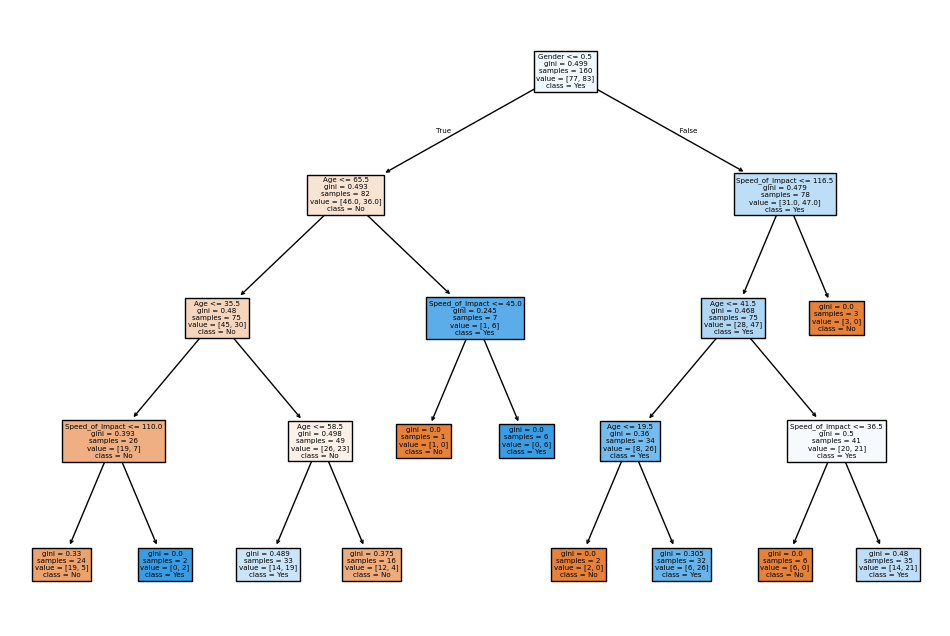

In [57]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

### Interpretation of the Tree

1. Understanding the Root Node (Top Node)

Root Node: Gender <= 0.5
- This is the first and most important split in the dataset.
- It means Gender is a crucial factor in determining survival.
- If Gender <= 0.5 (likely Male), move to the left subtree.
- If Gender > 0.5 (likely Female), move to the right subtree.
- Gini impurity = 0.49 (moderate impurity, meaning mixed classes).
- Values = [77, 89] (77 died, 89 survived).
- Since more people survived (class = Yes), the majority class is "Yes".

2. Left Subtree (For Males)
- First split: Age <= 33.5
- Age is the next most important factor for males.
- If Age <= 33.5, go left.
- If Age > 33.5, go right.
For Younger Males (Age ≤ 33.5)
- Split on Speed_of_Impact ≤ 11.0:
  
        - If Speed is low (≤ 11.0), the probability of death is higher (orange node).
        - If Speed is high, the probability of survival is higher (blue node).

For Older Males (Age > 33.5)
- Split on Speed_of_Impact ≤ 56.0:
  
        - If Speed is low (≤ 56.0), survival rate is higher (blue node).
        - If Speed is high (> 56.0), survival rate decreases (orange node).

3. Right Subtree (For Females)
- First split: Speed_of_Impact <= 116.5
- If Speed is low (≤ 116.5), go left.
- If Speed is high (> 116.5), go right.
- 
For Lower Speed (Speed ≤ 116.5)
- Next split on Age ≤ 41.2:
  
        - If Age ≤ 41.2, survival is high (blue node).
        - If Age > 41.2, death probability increases (orange node).
For Higher Speed (Speed > 116.5)
- Next split on Speed_of_Impact ≤ 26.5:
- 
        - If Speed is very low (≤ 26.5), survival is higher.
        - If Speed is high (> 26.5), death probability is higher.

4. Insights from the Decision Tree
    - Gender is the most important factor (appears at the root).
    - Age plays a critical role (appears early in both male and female branches).
    - Speed of Impact is a major risk factor (multiple splits based on speed).
    - If speed is very high (> 116.5), survival chances drop significantly.
    - Younger individuals (Age ≤ 33.5 for males, ≤ 41.2 for females) have a better chance of survival.
    - Helmets or seatbelts are not used as primary split points, meaning they may not be as influential in this dataset.

# Random Forest

Random Forest is a powerful machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that builds multiple decision trees and merges their outputs to improve accuracy and reduce overfitting.

#### Why Use Random Forest?

- Handles large datasets with high dimensionality
- Reduces overfitting compared to individual decision trees
- Works well for both classification and regression
- Can handle missing values effectively
- Provides feature importance rankings

#### How Random Forest Works

Random Forest follows these key steps:

- Bootstrap Sampling (Bagging): It randomly selects subsets of the training data (with replacement).
- Feature Selection: At each node of a tree, only a random subset of features is considered for splitting.
- Building Multiple Decision Trees: Each tree is trained on a different subset of data.
- Majority Voting (for Classification) / Averaging (for Regression): The final prediction is made by aggregating the results from all trees.

## Implementation of Random Forest in Python

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [59]:
# Load the dataset
file_path = "accident.csv"
df = pd.read_csv(file_path)

In [61]:
# Handle Missing Values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  # Fill missing gender with mode
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())  # Fill missing speed with median


In [63]:
# Encode Categorical Variables
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Convert Male=1, Female=0
df['Helmet_Used'] = encoder.fit_transform(df['Helmet_Used'])  # Yes=1, No=0
df['Seatbelt_Used'] = encoder.fit_transform(df['Seatbelt_Used'])  # Yes=1, No=0

In [65]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Step 5: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test) # Make Predictions

In [49]:
#  Model evalution
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.53
Confusion Matrix:
 [[14  8]
 [11  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60        22
           1       0.47      0.39      0.42        18

    accuracy                           0.53        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.52      0.53      0.52        40



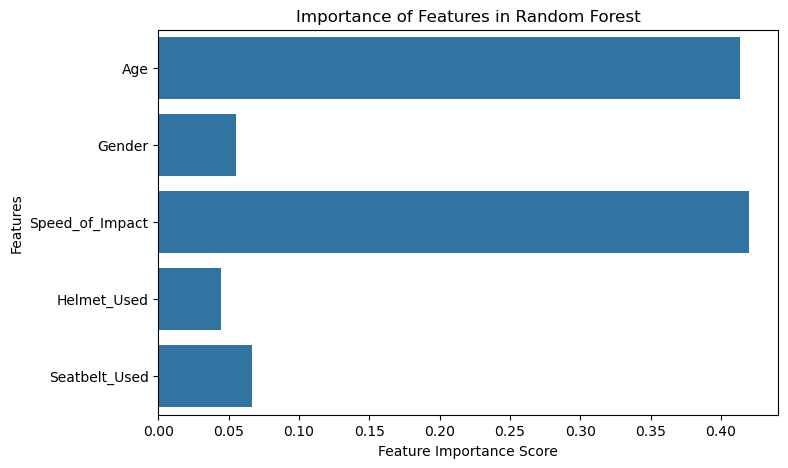

In [51]:
# Feature Importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Importance of Features in Random Forest")
plt.show()

## Practice Exercise

#### Use the Titanic data from seaborn to answer the questions below. 

The Titanic dataset is a well-known real-world dataset that predicts whether a passenger survived based on their characteristics.

Dataset Columns:

- Survived (Target Variable: 0 = No, 1 = Yes)
- Pclass (Passenger Class: 1st, 2nd, 3rd)
- Sex (Male/Female)
- Age (Passenger Age)
- SibSp (Number of Siblings/Spouses Aboard)
- Parch (Number of Parents/Children Aboard)
- Fare (Ticket Fare)
  
#### Objective: Train a Decision Tree and Random Forest model to predict who survived the Titanic disaster.

In [78]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load Titanic dataset
df = sns.load_dataset('titanic')

## Q1. Data Preparation

Tasks:

- Drop unnecessary columns (Name, Ticket, Cabin).
- Handle missing values (Age, Embarked).
- Convert categorical variables (Sex, Embarked) to numerical.
- Split data into train and test sets.

## Q2. Train a Decision Tree Model

Task: 
- Decision Tree Classifier on the Titanic dataset.
- Use max_depth=3 and criterion='gini' initially.
- Print training and test accuracy.
- Visualize the Decision Tree.
- Which feature was chosen as the first split? Why?
- What happens if you change max_depth to 5?

## Q3: Improve the Decision Tree

Task: 

- Try changing the max_depth parameter to 5, 7, and None.
- Experiment with criterion='entropy' instead of gini.
- Use cross-validation to find the best depth.
- What is the best max_depth based on accuracy?
- How does entropy differ from gini in classification?
- What is the effect of increasing tree depth?

## Q4. Implement a Random Forest Model

Tasks: 

- Train a Random Forest model with 100 trees (n_estimators=100).
- Compare its accuracy with the Decision Tree model.
- Find feature importance to see which variables matter most.
- Does Random Forest perform better than Decision Tree? Why?
- Which features are most important in predicting survival?
- What happens if you reduce the number of trees (n_estimators=10)?